<div style="display: flex; background-color: RGB(255,60,100);" >
<h1 style="margin: auto; padding: 30px; ">Explainable AI for Heart Disease Prediction</h1>
</div>


# OBJECTIF DE CE NOTEBOOK

The dataset 

<div style="border: 1px solid RGB(255,16,120);" >
<h3 style="margin: auto; padding: 20px; color: RGB(255,16,120); "> Importation des librairies</h3>
</div>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

<div style="border: 1px solid RGB(255,16,120);" >
<h3 style="margin: auto; padding: 20px; color: RGB(255,16,120); "> Data Collection and Processing</h3>
</div>

## Load and Inspect the Dataset

In [61]:
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

### First 5 rows

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Last 5 rows

In [63]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### getting some info about the data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [65]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

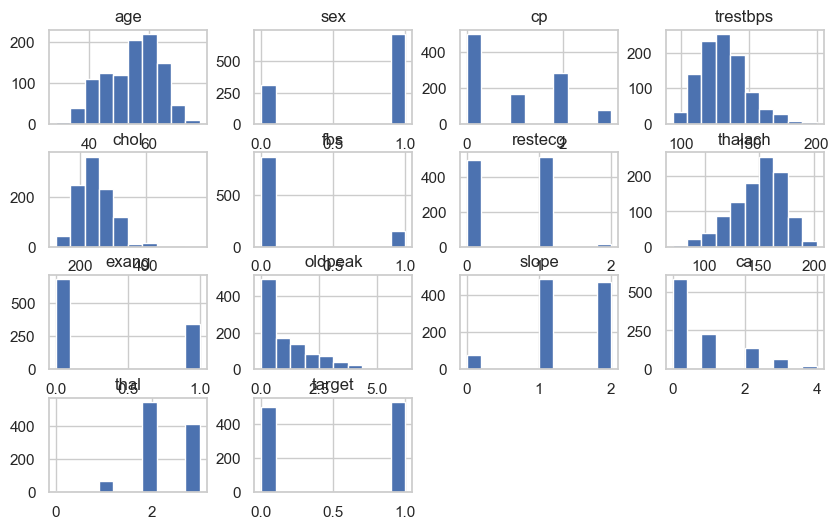

In [66]:
df.hist()

### Missing Values Count

In [67]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check for duplicates


In [68]:
df.duplicated().sum()

np.int64(723)

### Unique values per column

In [69]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

age: 41 unique values
sex: 2 unique values
cp: 4 unique values
trestbps: 49 unique values
chol: 152 unique values
fbs: 2 unique values
restecg: 3 unique values
thalach: 91 unique values
exang: 2 unique values
oldpeak: 40 unique values
slope: 3 unique values
ca: 5 unique values
thal: 4 unique values
target: 2 unique values


In [70]:
# checking the distribution of the target variable
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

### Outliers Analysis

In [71]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [72]:
chol_outliers, lb, ub = detect_outliers(df, 'chol')
print(f"\nValues of Cholesterol Outliers: {len(chol_outliers)} cases (outside the range {lb:.1f} - {ub:.1f})")


Values of Cholesterol Outliers: 16 cases (outside the range 115.0 - 371.0)


<div style="border: 1px solid RGB(255,16,120);" >
<h3 style="margin: auto; padding: 20px; color: RGB(255,16,120); "> Target Distribution</h3>
</div>

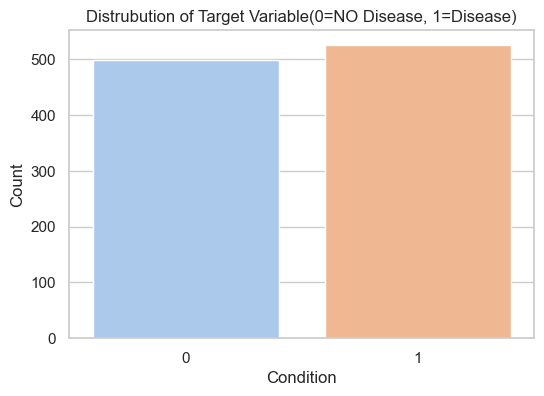

In [73]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=df, palette='pastel')
plt.title("Distrubution of Target Variable(0=NO Disease, 1=Disease)")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()


<div style="border: 1px solid RGB(255,16,120);" >
<h3 style="margin: auto; padding: 20px; color: RGB(255,16,120); "> Correlation Matrix</h3>
</div>

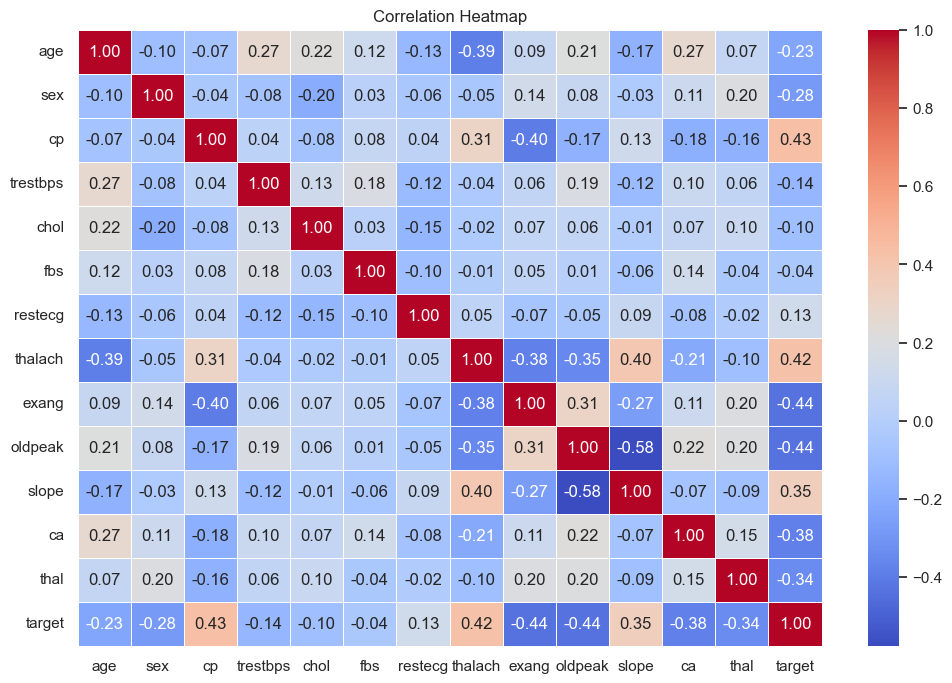

In [74]:

plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Boxplot

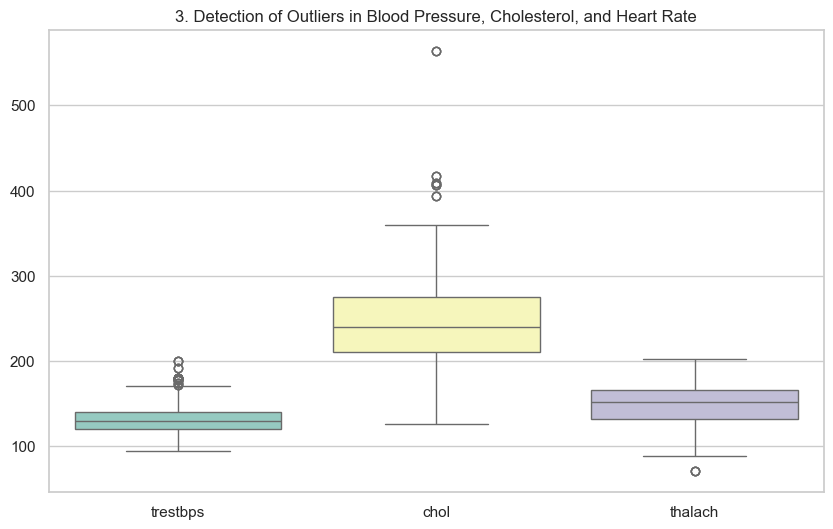

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['trestbps', 'chol', 'thalach']], palette='Set3')

plt.title("3. Detection of Outliers in Blood Pressure, Cholesterol, and Heart Rate")
plt.show()

### Histogram + KDE

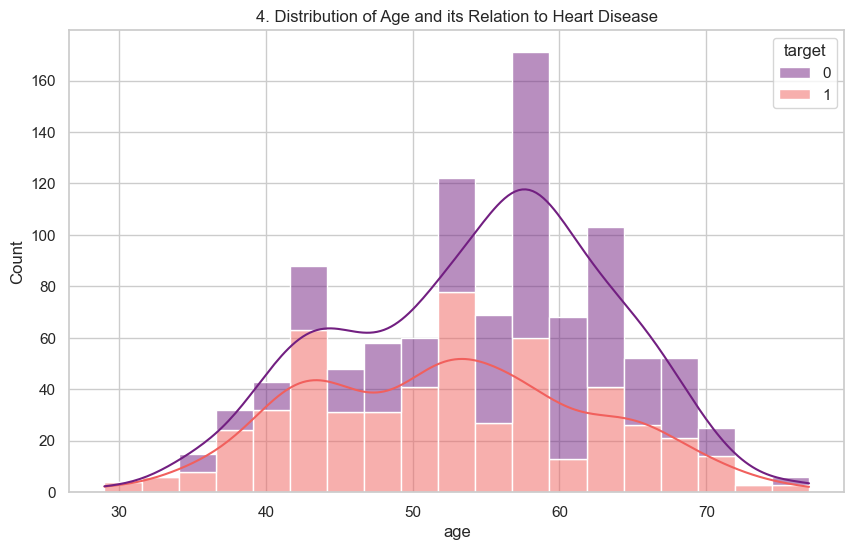

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, multiple="stack", palette='magma')
plt.title("4. Distribution of Age and its Relation to Heart Disease")
plt.show()

### Scatter Plot

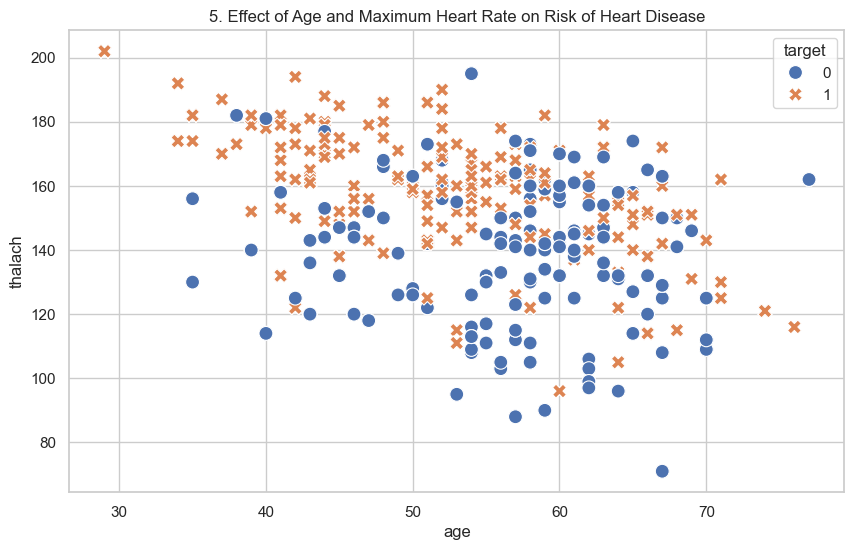

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', style='target', s=100)
plt.title("5. Effect of Age and Maximum Heart Rate on Risk of Heart Disease")
plt.show()

### Categorical Analysis

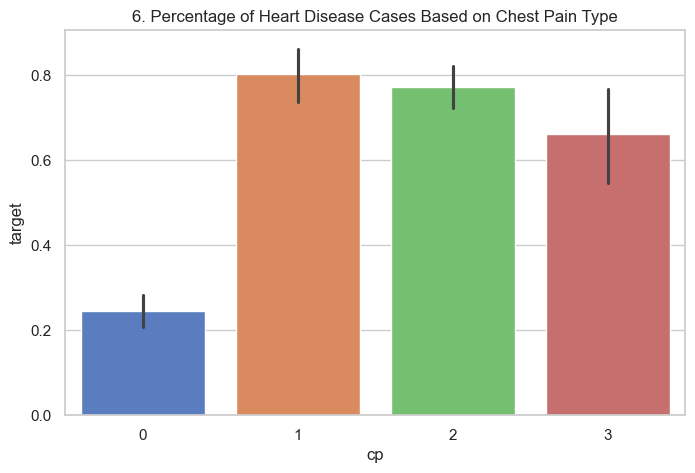

In [78]:
plt.figure(figsize=(8, 5))
sns.barplot(x='cp', y='target', data=df, palette='muted')
plt.title("6. Percentage of Heart Disease Cases Based on Chest Pain Type")
plt.show()

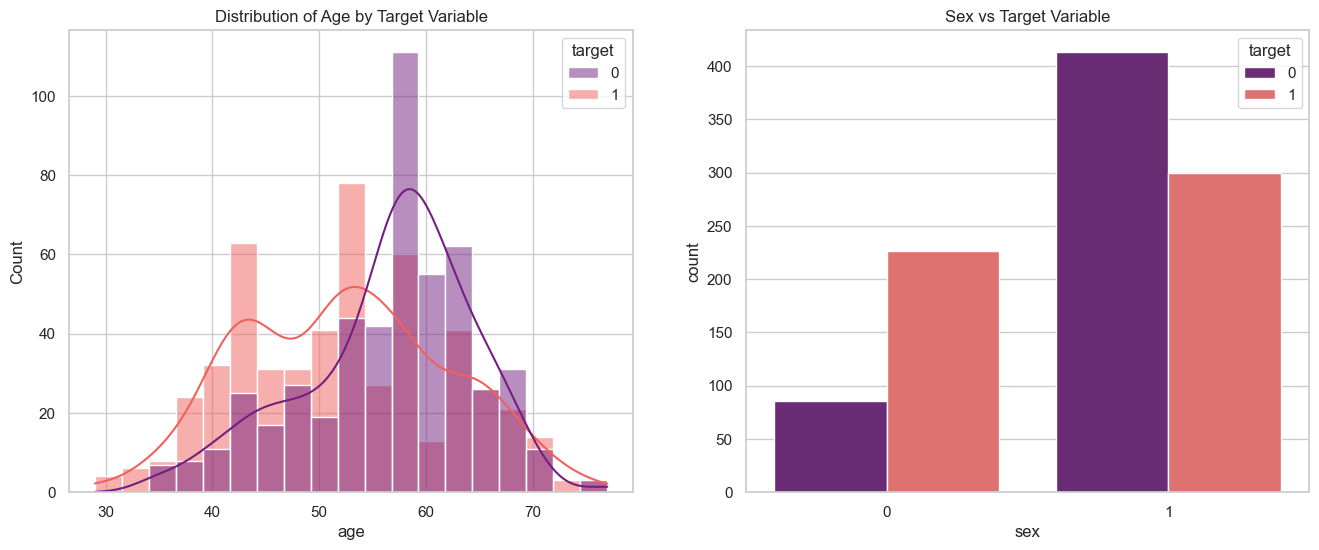

In [98]:
# Visualize the distribution of age and chest pain type (cp) with respect to the target variable

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, ax=ax1, palette='magma')
ax1.set_title('Distribution of Age by Target Variable')

sns.countplot(data=df, x='sex', hue='target', ax=ax2, palette='magma')
ax2.set_title('Sex vs Target Variable')
plt.show()

<div style="border: 1px solid RGB(255,16,120);" >
<h3 style="margin: auto; padding: 20px; color: RGB(255,16,120); "> Preprocessing</h3>
</div>

In [80]:
# Preprocessing
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Train the Random Forst Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

#Define the Grid search parameters
Hyper_paramters={'criterion':['entropy'],'max_depth':[4,10],'n_estimators':[50, 100], 'max_features':['sqrt'] }

#Define the five fold Cross Validation max_features
Gridsearch_paramters=GridSearchCV(RandomForestClassifier(),Hyper_paramters,scoring='recall',n_jobs=-1,cv=5,verbose=2)
crossvalidation=Gridsearch_paramters.fit(X_train,y_train)


#Print the best hyper paramters combination for the best model
print ("The best paramter combination is ")
print(crossvalidation.best_params_)  #gets best estimator

Final_Model=crossvalidation.best_estimator_ #gets best estimator

print("The best AUC score was ")
print(crossvalidation.best_score_)  

importances=crossvalidation.best_estimator_.feature_importances_
importances
#Print all importance
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
The best paramter combination is 
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
The best AUC score was 
0.9880952380952381
('age', array([0.11146146]))
('sex', array([0.03757444]))
('cp', array([0.11783879]))
('trestbps', array([0.07689818]))
('chol', array([0.08051444]))
('fbs', array([0.01214938]))
('restecg', array([0.02050612]))
('thalach', array([0.11388204]))
('exang', array([0.05768546]))
('oldpeak', array([0.11454621]))
('slope', array([0.04046826]))
('ca', array([0.10802448]))
('thal', array([0.10845074]))


Predict using the best model (The last model trained)

In [82]:
#Prediction Using the Model
y_pred = Final_Model.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["Safe", "Fraud"]))

#Calculate sensitivity and specificity

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[100   0]
 [  0 105]]
              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00       100
       Fraud       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0


Plot a confusion Matrix

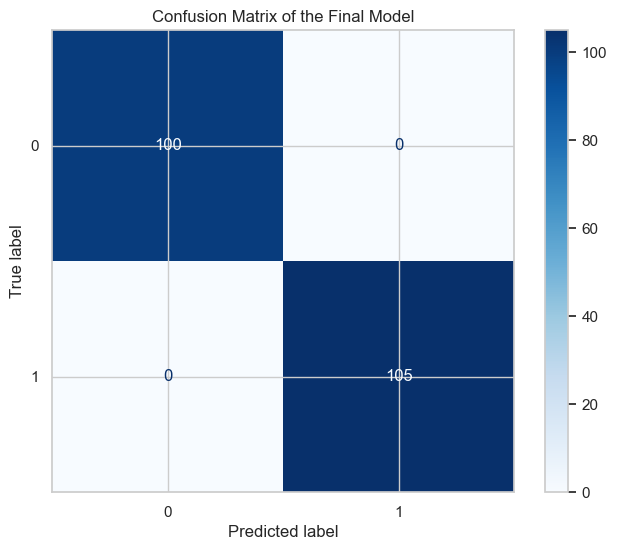

In [83]:


y_pred = Final_Model.predict(X_test)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(Final_Model, X_test, y_test, cmap='Blues', ax=ax)
plt.title('Confusion Matrix of the Final Model')
plt.show()

Plot ROC Curve

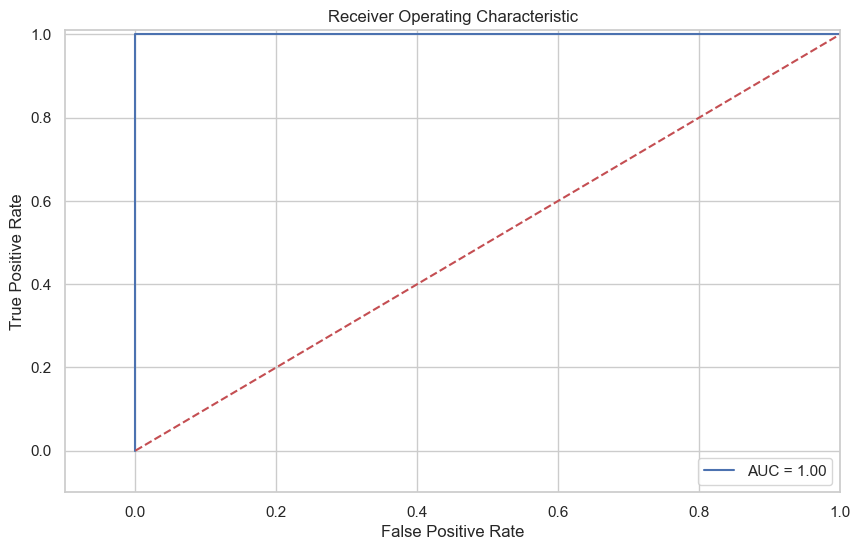

In [84]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

plt.rcParams.update({'font.size': 10})

fpr, tpr, thresholds = roc_curve(y_test.ravel(),y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

XGB

In [85]:
from xgboost import XGBClassifier

# Define the Grid search parameters for XGBoost
xgb_params = {
    'n_estimators': [50,60,70,80,90, 100,200],
    'learning_rate': [0.01,0.02,0.05],
    'max_depth': [3,4,5,7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


# XGBoost Grid Search
xgb_grid_search = GridSearchCV(XGBClassifier(), xgb_params, scoring='recall', n_jobs=-1, cv=5, verbose=2)
xgb_grid_search.fit(X_train, y_train)

best_model = xgb_grid_search.best_estimator_
print(f"\nBest parameters: {xgb_grid_search.best_params_}")

Fitting 5 folds for each of 336 candidates, totalling 1680 fits

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [86]:
print ("The best paramter combination is ")
print(xgb_grid_search.best_params_)  #gets best estimator

# Prediction Using the Model
y_pred_xgb = xgb_grid_search.best_estimator_.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)
print(classification_report(y_test, y_pred_xgb, target_names=["Safe", "Fraud"]))

# Calculate sensitivity, specificity, and accuracy
total_xgb = sum(sum(cm_xgb))
accuracy_xgb = (cm_xgb[0,0] + cm_xgb[1,1]) / total_xgb
print('Accuracy (XGBoost): ', accuracy_xgb)

sensitivity_xgb = cm_xgb[0,0] / (cm_xgb[0,0] + cm_xgb[0,1])
print('Sensitivity (XGBoost): ', sensitivity_xgb)

specificity_xgb = cm_xgb[1,1] / (cm_xgb[1,0] + cm_xgb[1,1])
print('Specificity (XGBoost): ', specificity_xgb)

The best paramter combination is 
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
[[100   0]
 [  0 105]]
              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00       100
       Fraud       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy (XGBoost):  1.0
Sensitivity (XGBoost):  1.0
Specificity (XGBoost):  1.0


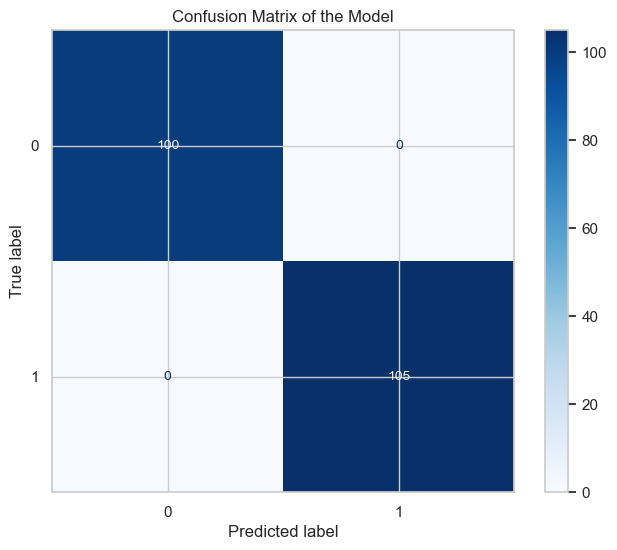

In [87]:
y_pred = best_model.predict(X_test)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues', ax=ax)
plt.title('Confusion Matrix of the Model')
plt.show()

In [ ]:
import time
# Random Forest
start_rf = time.time()
crossvalidation.best_estimator_.fit(X_train, y_train) 

end_rf = time.time()
rf_time = end_rf - start_rf
rf_score = crossvalidation.best_score_

In [ ]:
# XGBoost
start_xgb = time.time()
xgb_grid_search.best_estimator_.fit(X_train, y_train) 

end_xgb = time.time()
xgb_time = end_xgb - start_xgb
xgb_score = xgb_grid_search.best_score_

In [ ]:
metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'CV Recall Score': [rf_score, xgb_score],
    'Training Time (sec)': [rf_time, xgb_time]
}
df_compare = pd.DataFrame(metrics)

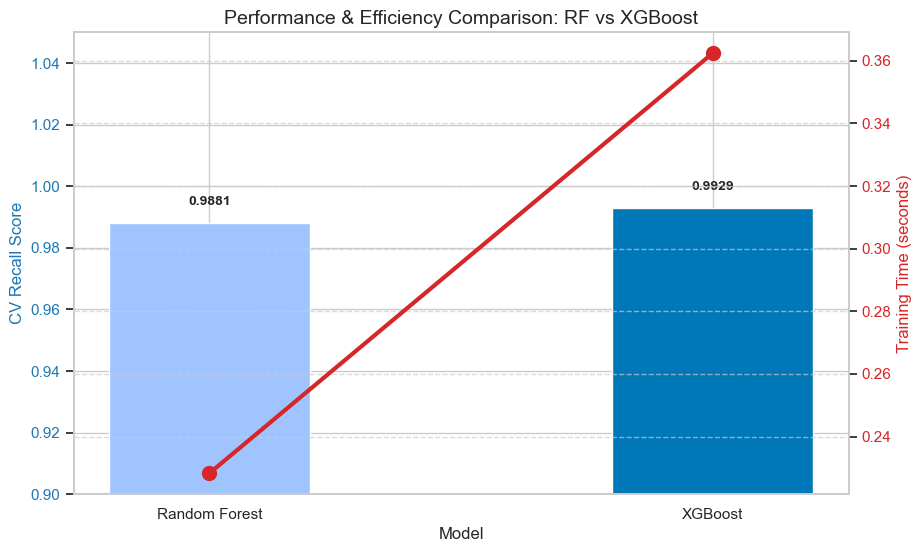

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

#  Score 
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('CV Recall Score', color=color)
bars = ax1.bar(df_compare['Model'], df_compare['CV Recall Score'], color=['#A0C4FF', '#0077B6'], width=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.9, 1.05)

ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color)
ax2.plot(df_compare['Model'], df_compare['Training Time (sec)'], color=color, marker='o', linewidth=3, markersize=10)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Performance & Efficiency Comparison: RF vs XGBoost', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}', ha='center', va='bottom', fontweight='bold')

plt.show()

SHAP


SHAP Summary Plot:


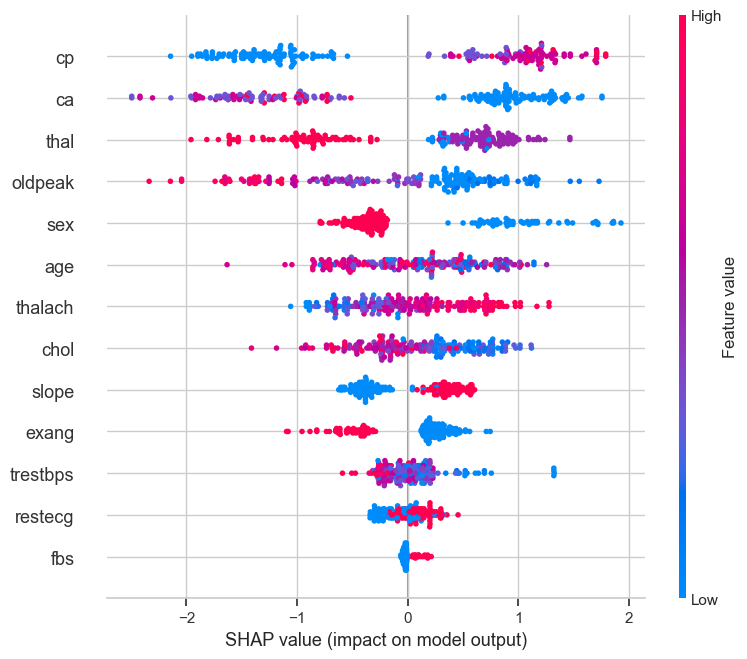

In [88]:
# SHAP 
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

#  drawing the SHAP summary plot
print("\nSHAP Summary Plot:")
shap.summary_plot(shap_values, X_test)

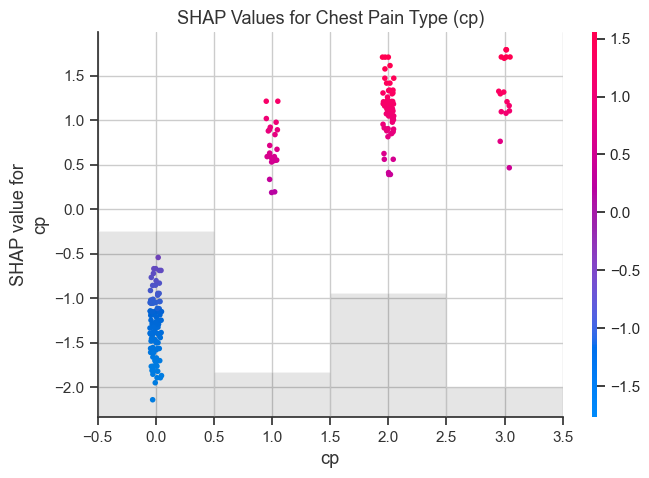

In [89]:
shap.plots.scatter(shap_values[:, "cp"], color=shap_values[:, "cp"].values, title="SHAP Values for Chest Pain Type (cp)")

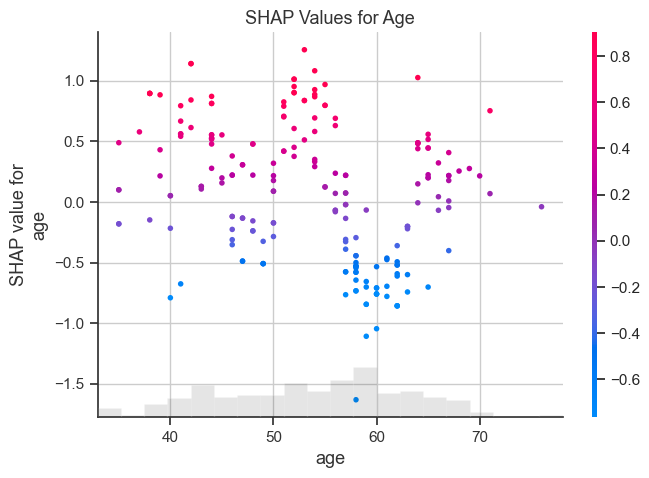

In [90]:
shap.plots.scatter(shap_values[:, "age"], color=shap_values[:, "age"].values, title="SHAP Values for Age")

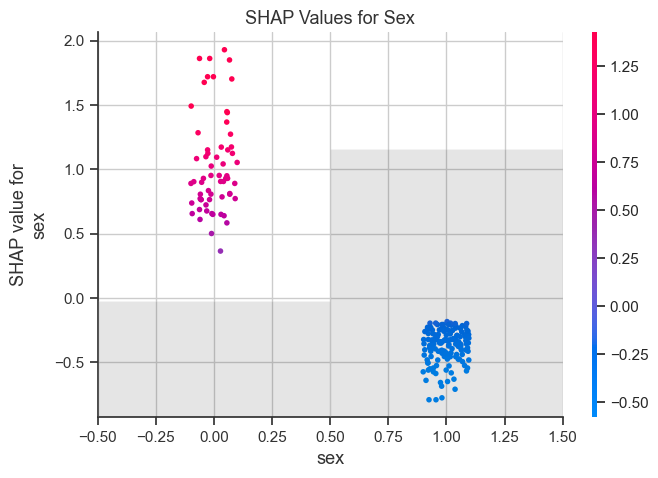

In [91]:
shap.plots.scatter(shap_values[:, "sex"], color=shap_values[:, "sex"].values, title="SHAP Values for Sex")

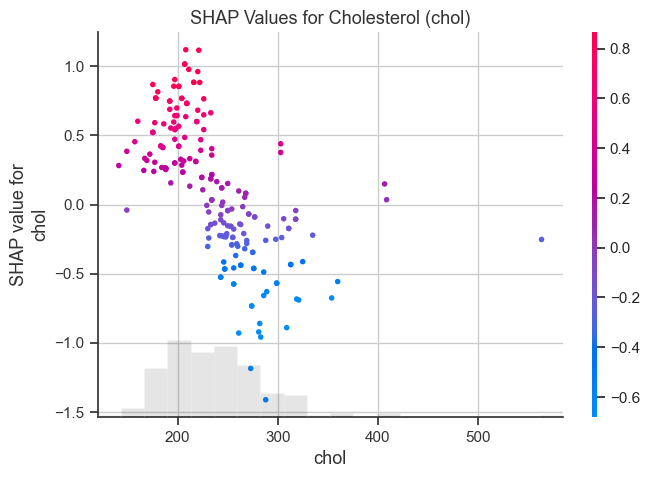

In [92]:
shap.plots.scatter(shap_values[:, "chol"], color=shap_values[:, "chol"].values, title="SHAP Values for Cholesterol (chol)")

In [93]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("\n تم حفظ النموذج بنجاح!")


 تم حفظ النموذج بنجاح!
